In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from Bio.Phylo._io import parse
from Bio.Phylo.BaseTree import Tree as BioTree

from src.datasets.load_trees import load_trees_from_file
from src.utils.tree_utils import get_taxa_names
from src.utils.tree_utils import get_tree_height
from src.distribution_analysis.process_tree import get_observed_nodes, get_clade_split_df

In [100]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [101]:
REFERENCE_TREE_FILE = Path("data/beast/ds1-0.trees")
SAMPLE_TREES_FILE = Path("data/validation/ds1-0_sampled-trees_mu-sigma.trees")
NUM_TAXA = 27

In [102]:
ref_trees = load_trees_from_file(REFERENCE_TREE_FILE, 1000)

In [103]:
sample_trees = load_trees_from_file(SAMPLE_TREES_FILE, 1000)

In [104]:
taxa_names = get_taxa_names(ref_trees[0])

<Axes: ylabel='Density'>

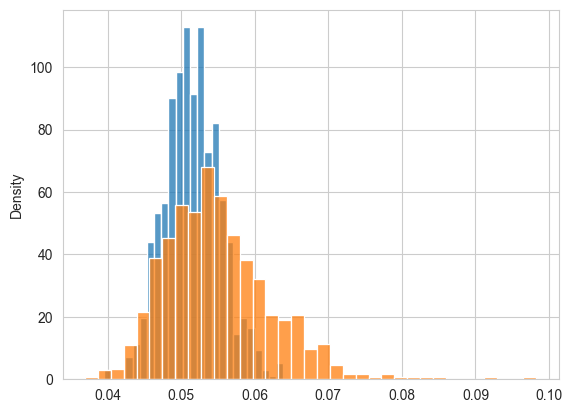

In [105]:
ref_tree_heights = [
    get_tree_height(tree)
    for tree in ref_trees
]
sample_tree_heights = [
    get_tree_height(tree)
    for tree in sample_trees
]
sns.histplot(
    ref_tree_heights,
    stat="density",
    label="Reference",
)
sns.histplot(
    sample_tree_heights,
    stat="density",
    label="Sample",
)

In [106]:
_, sample_clade_splits = get_observed_nodes(sample_trees, taxa_names)
_, ref_clade_splits = get_observed_nodes(ref_trees, taxa_names)

sample_branches = get_clade_split_df(sample_clade_splits)
ref_branches = get_clade_split_df(ref_clade_splits)

1


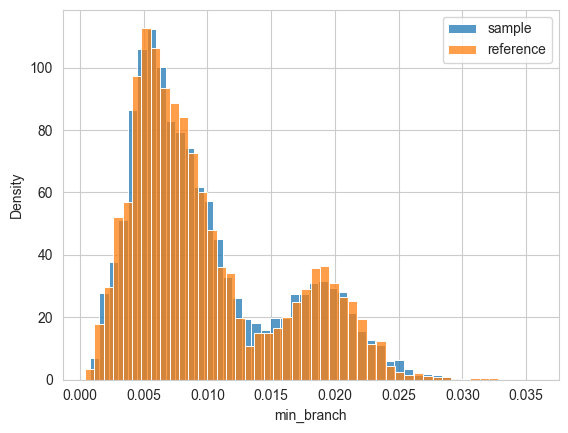

2


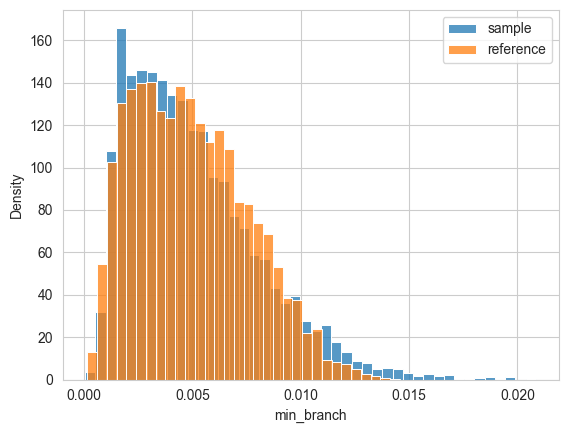

3


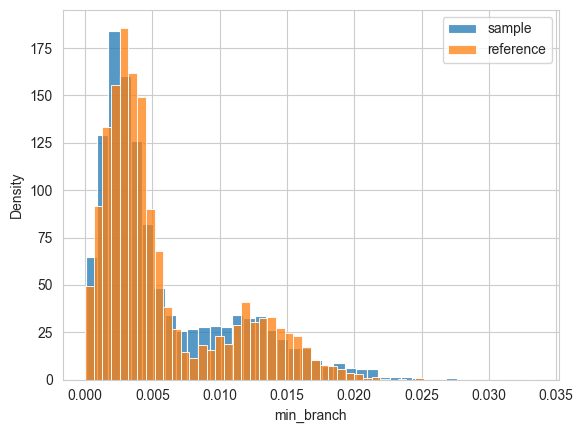

4


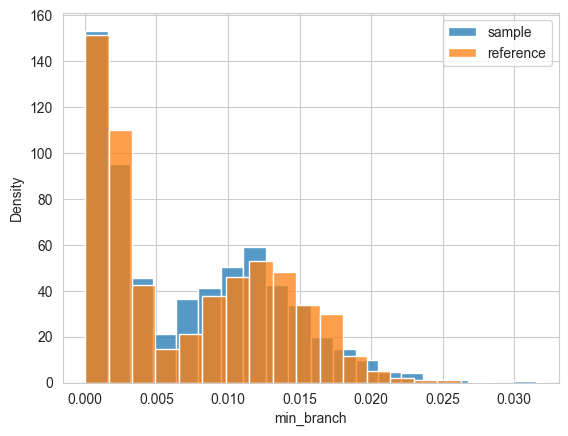

5


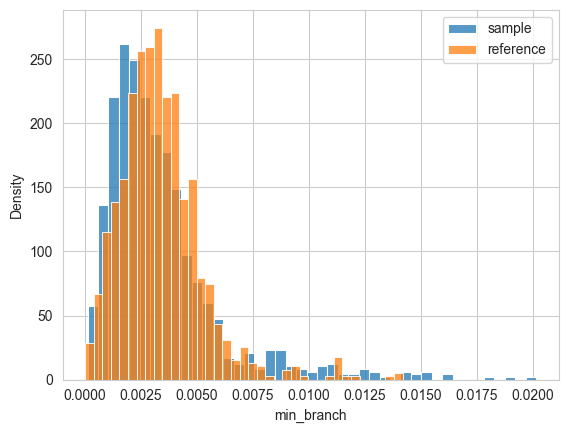

6


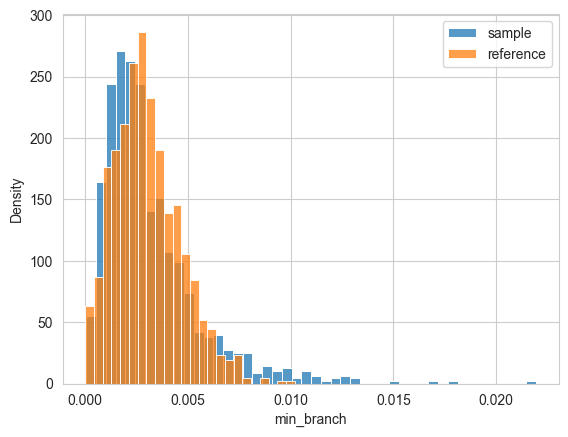

7


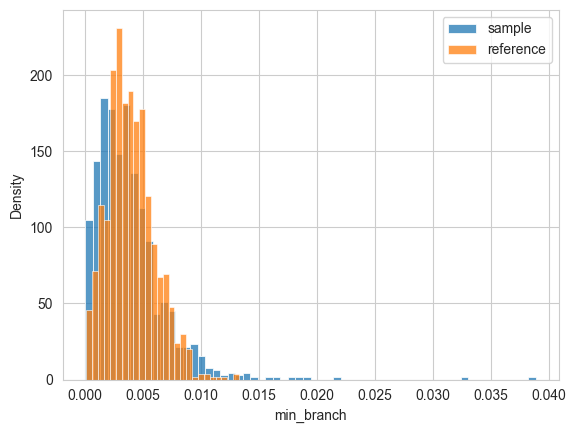

8


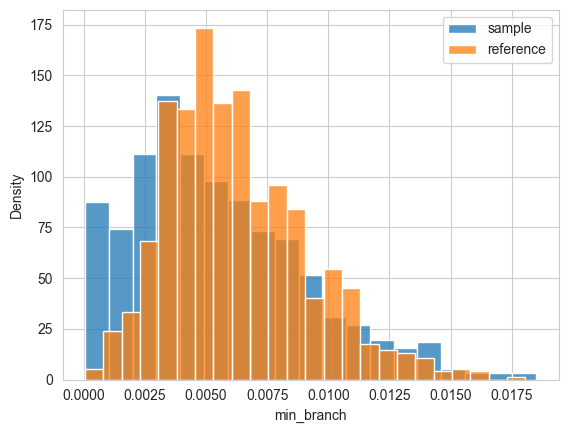

9


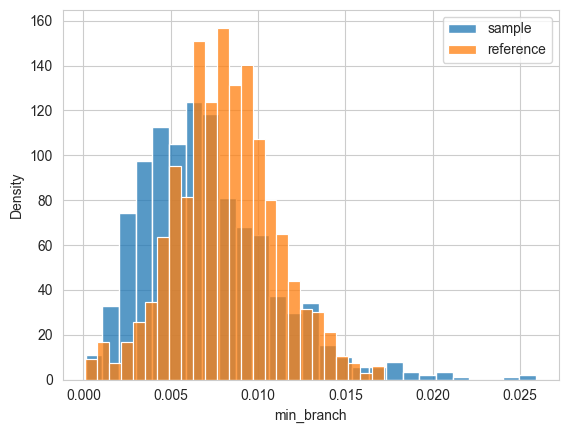

10


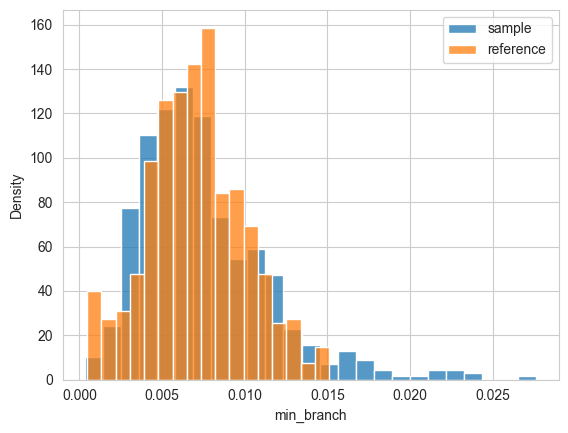

11


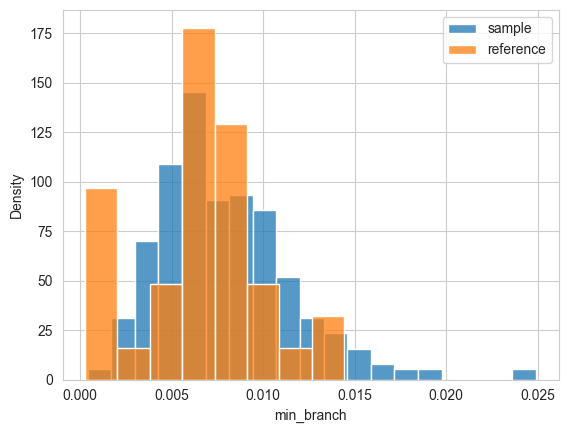

In [113]:
for d in sorted(ref_branches.distance_to_leaf.unique()):
    print(d)
    
    sns.histplot(
        sample_branches[sample_branches.distance_to_leaf == d], 
        x="min_branch", 
        label="sample",
        stat="density",
    )
    sns.histplot(
        ref_branches[ref_branches.distance_to_leaf == d], 
        x="min_branch", 
        label="reference",
        stat="density",
    )

    plt.legend(loc="upper right")
    plt.show()



<Axes: xlabel='min_branch', ylabel='Density'>

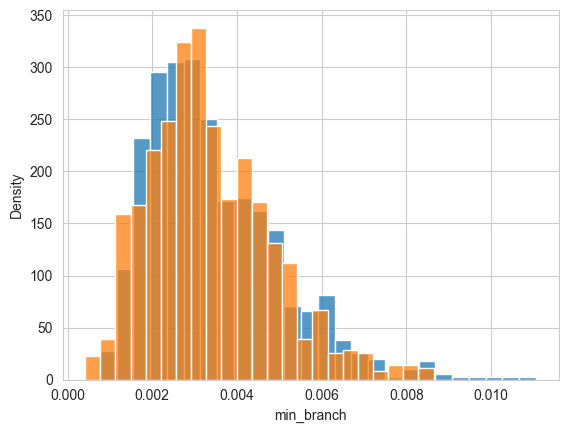

In [108]:
sns.histplot(
    sample_branches[(sample_branches.clade_split == "0010000000||0100000000")], 
    x="min_branch", 
    label="sample",
    stat="density",
)
sns.histplot(
    ref_branches[(ref_branches.clade_split == "0010000000||0100000000")], 
    x="min_branch", 
    label="reference",
    stat="density",
)

0010000000||0100000000


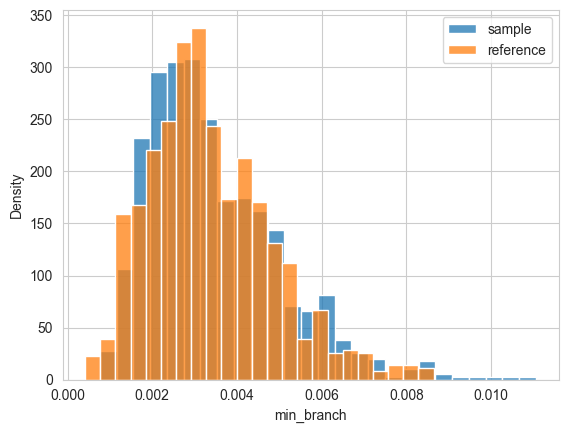

10000000000||100000000000


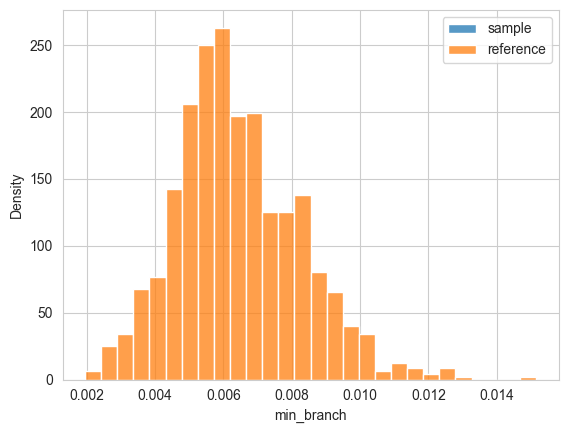

100000000000000||1000000000000000


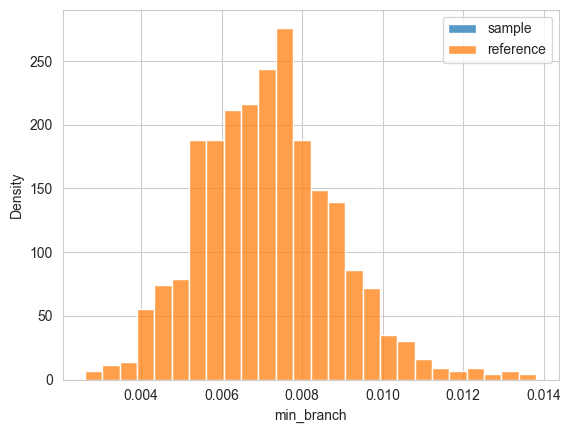

100000000000000000||1000000000000000000


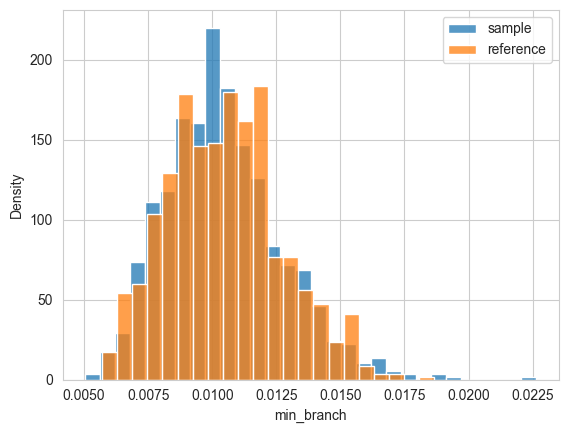

10000000000000000000||100000000000000000000


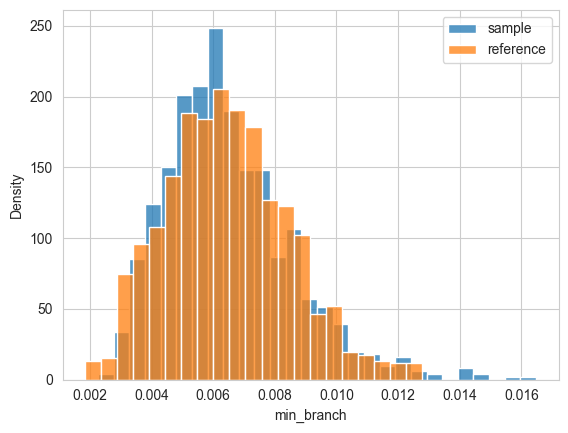

1000000000000000000000||10000000000000000000000


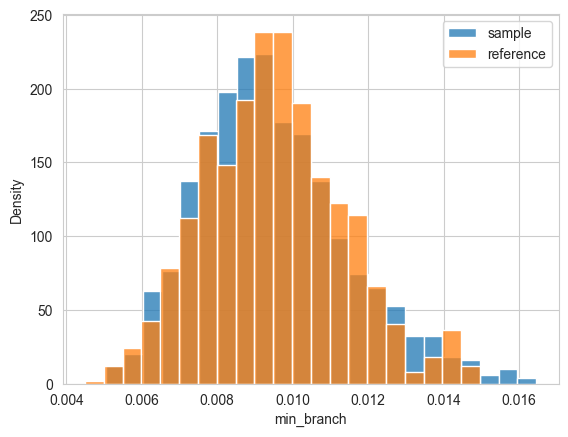

110000000000000000000||11000000000000000000000


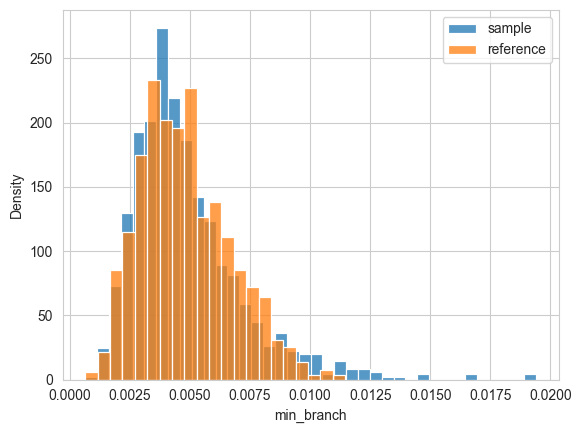

1100000000000000000||11110000000000000000000


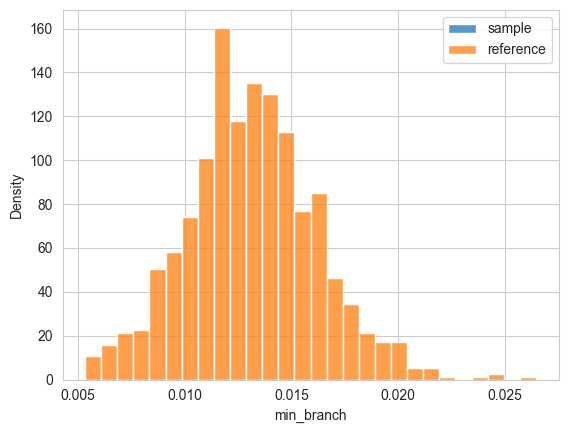

1000000000000000000000000||10000000000000000000000000


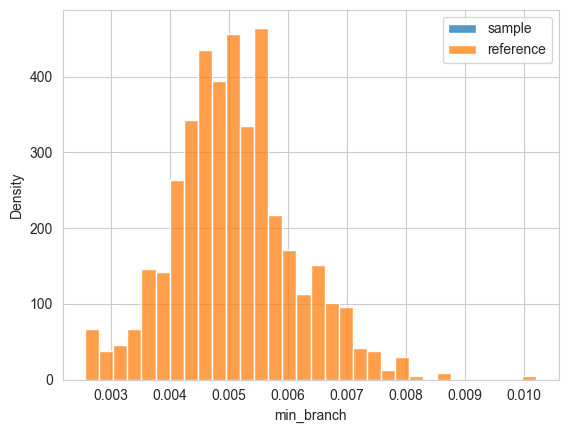

100000000000000000000000||11000000000000000000000000


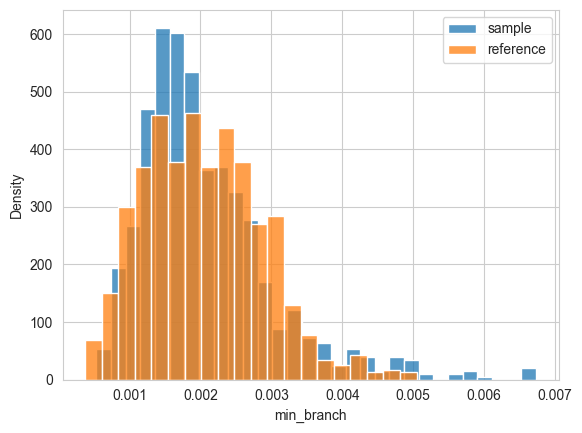

11100000000000000000000000||100000000000000000000000000


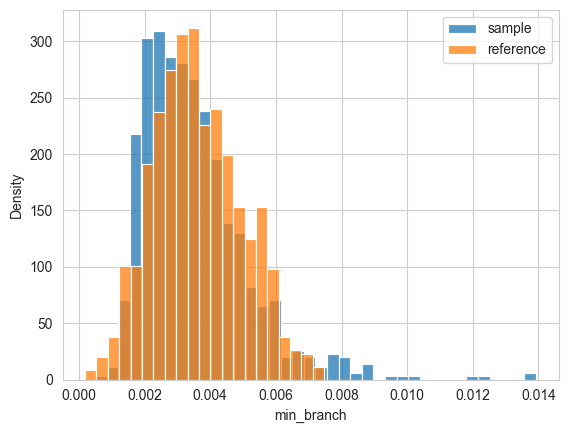

10000000000000||1100000000000000


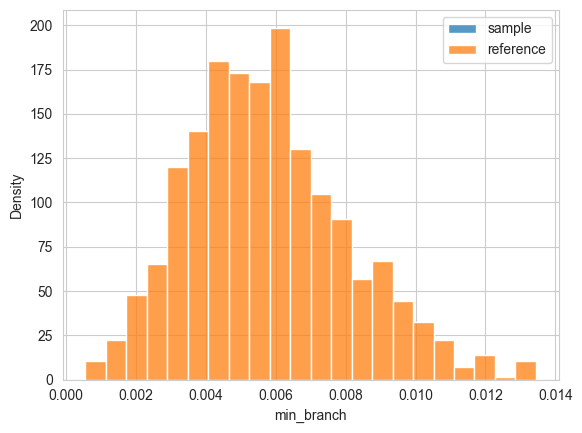

11111100000000000000000||111100000000000000000000000


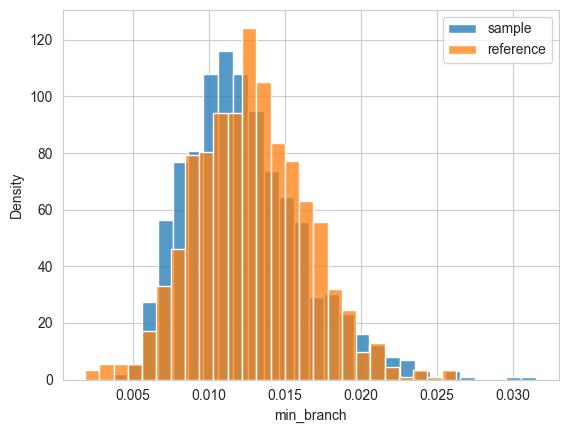

0000111110||1111111111000000


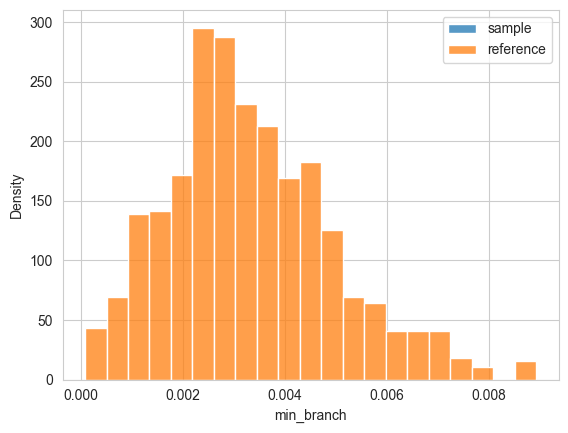

1111111000000||1110000000000000


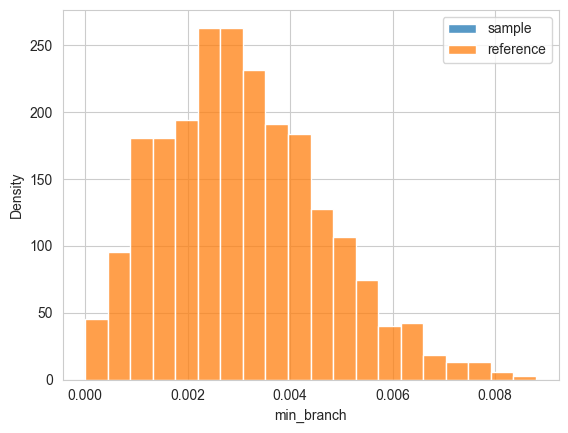

1111111111111110||10000000000000000


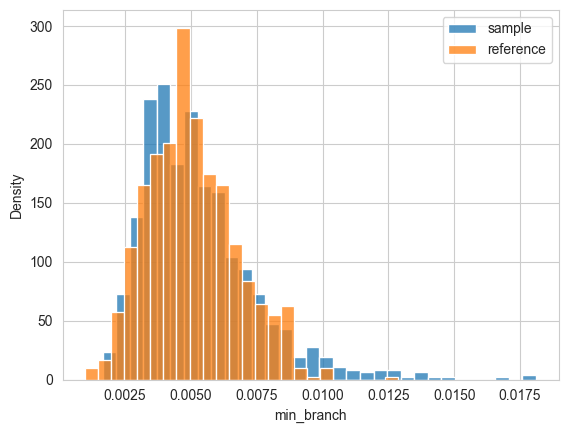

0000001000||0000010000


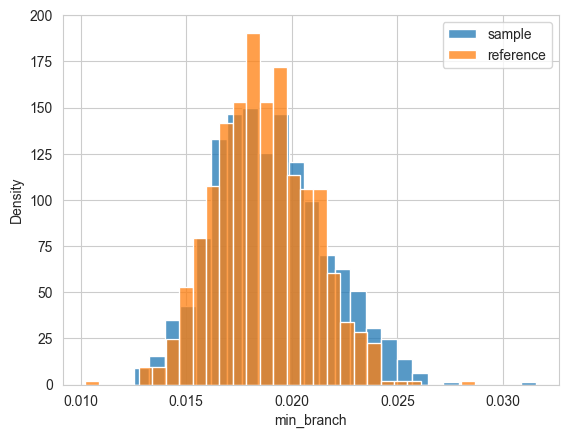

11111111111111110||0000000001


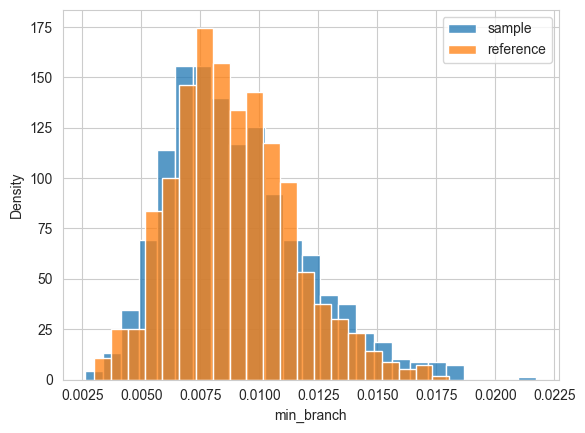

11111111111111111||111111111100000000000000000


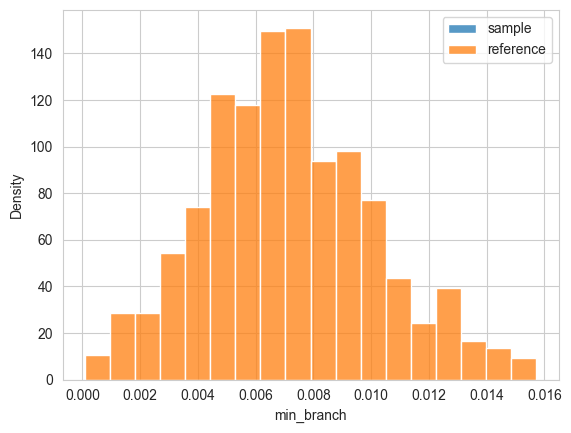

0000011000||0000100000


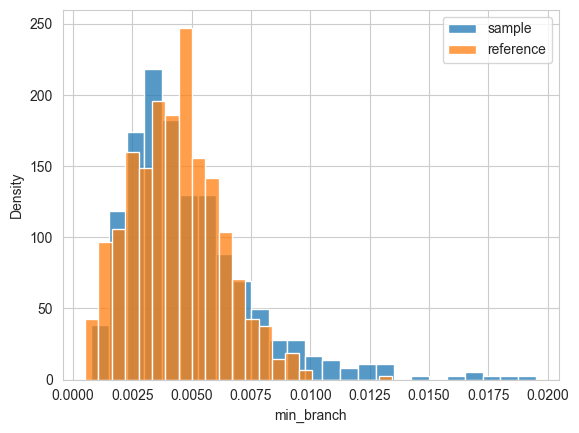

In [109]:
from collections import Counter

for clade_split, _ in Counter(ref_branches.clade_split).most_common(20):
    print(clade_split)
    
    sns.histplot(
        sample_branches[sample_branches.clade_split == clade_split], 
        x="min_branch", 
        label="sample",
        stat="density",
    )
    sns.histplot(
        ref_branches[ref_branches.clade_split == clade_split], 
        x="min_branch", 
        label="reference",
        stat="density",
    )

    plt.legend(loc="upper right")
    plt.show()



0000011000||0000100000


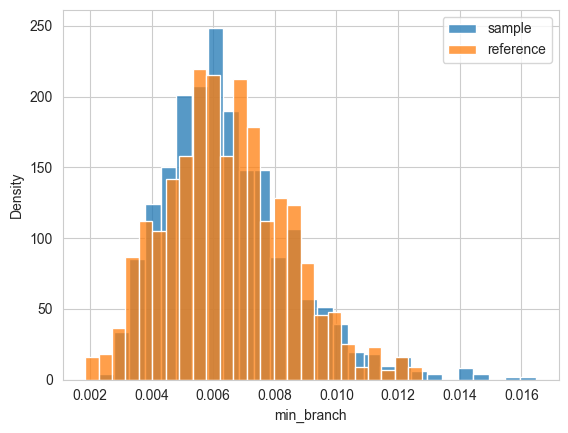

In [110]:
cs = "10000000000000000000||100000000000000000000"

print(clade_split)

sns.histplot(
    sample_branches[sample_branches.clade_split == cs], 
    x="min_branch", 
    label="sample",
    stat="density",
)
sns.histplot(
    ref_branches[ref_branches.clade_split == cs], 
    x="min_branch", 
    label="reference",
    stat="density",
    bins=25
)

plt.legend(loc="upper right")
plt.show()



In [111]:
import numpy as np

(
    np.mean(np.log(sample_branches[sample_branches.clade_split == cs]["min_branch"])), 
    np.mean(np.log(sample_branches[sample_branches.clade_split == cs]["min_branch"])), 
)

(np.float64(-5.083737245866385), np.float64(-5.083737245866385))

In [112]:
import numpy as np

(
    np.var(np.log(sample_branches[sample_branches.clade_split == cs]["min_branch"])),
    np.var(np.log(ref_branches[ref_branches.clade_split == cs]["min_branch"]))
)

(np.float64(0.09596241622882525), np.float64(0.10668205313902601))